In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
data = pd.read_csv('/content/sample_data/data.csv')

In [3]:
pd.set_option('display.max_columns',None)
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [4]:
#dataset has 6819 rows and 96 columns
data.shape

(6819, 96)

In [5]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
categorical_features = data.dtypes[data.dtypes == 'int64'].index

positive_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values(ascending=False)[:6].index#.tolist()
negative_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values()[:6].index#.tolist()

In [6]:
positive_corr

Index([' Debt ratio %', ' Current Liability to Assets',
       ' Borrowing dependency', ' Current Liability to Current Assets',
       ' Liability to Equity', ' Current Liabilities/Equity'],
      dtype='object')

In [7]:
negative_corr

Index([' Net Income to Total Assets',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' ROA(C) before interest and depreciation before interest',
       ' Net worth/Assets', ' Persistent EPS in the Last Four Seasons'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [9]:
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [10]:
#checking for null values
data.isnull().any()

Bankrupt?                                                   False
 ROA(C) before interest and depreciation before interest    False
 ROA(A) before interest and % after tax                     False
 ROA(B) before interest and depreciation after tax          False
 Operating Gross Margin                                     False
                                                            ...  
 Liability to Equity                                        False
 Degree of Financial Leverage (DFL)                         False
 Interest Coverage Ratio (Interest expense to EBIT)         False
 Net Income Flag                                            False
 Equity to Liability                                        False
Length: 96, dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


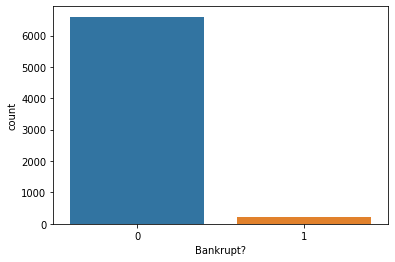

In [11]:
sns.countplot('Bankrupt?',data=data)

In [12]:
#defining dependent and independent variables
x = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

In [13]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
# Logistic Regression
#training model
start = time.time()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train,y_train)

#getting confusion matrix
# confusion matrix có dạng [[true negatives, false positives]
#                            [false negatives, true positives]]
from sklearn.metrics import confusion_matrix,classification_report
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred)
end = time.time()
print('accuracy score = ',lra)
print("Classification Report",classification_report(y_test,y_pred))
lrt = end - start
print('run time: ', lrt)

confusion matrix:
 [[1300   18]
 [  46    0]]
accuracy score =  0.9530791788856305
Classification Report               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.95      1364
   macro avg       0.48      0.49      0.49      1364
weighted avg       0.93      0.95      0.94      1364

run time:  0.3538193702697754


In [15]:
# KNeighbors Classifier
#training model
start = time.time()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
knn.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
knna = accuracy_score(y_test,y_pred)
end = time.time()
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))
knnt = end - start
print('run time: ', knnt)

confusion matrix:
 [[1317    1]
 [  46    0]]
accuracy score =  0.9655425219941349
Classification Report               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.97      0.95      1364

run time:  0.43206095695495605


In [16]:
# Gaussian Naves Bayes
# training model
start = time.time()
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = nb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
nba = accuracy_score(y_test,y_pred)
end = time.time()
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))
nbt = end - start
print('run time: ', nbt)

confusion matrix:
 [[  46 1272]
 [   2   44]]
accuracy score =  0.06598240469208211
Classification Report               precision    recall  f1-score   support

           0       0.96      0.03      0.07      1318
           1       0.03      0.96      0.06        46

    accuracy                           0.07      1364
   macro avg       0.50      0.50      0.07      1364
weighted avg       0.93      0.07      0.07      1364

run time:  0.02089667320251465


In [17]:
# Decision Tree Classifier
#training model
start = time.time()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
dta = accuracy_score(y_test,y_pred)
end = time.time()
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))
dtt = end - start
print('run time: ', dtt)

confusion matrix:
 [[1284   34]
 [  29   17]]
accuracy score =  0.9538123167155426
Classification Report               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1318
           1       0.33      0.37      0.35        46

    accuracy                           0.95      1364
   macro avg       0.66      0.67      0.66      1364
weighted avg       0.96      0.95      0.95      1364

run time:  0.5071640014648438


In [18]:
# Random Forest
#training model
start = time.time()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 60, criterion = 'entropy',random_state = 0)
rf.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
rfa = accuracy_score(y_test,y_pred)
end = time.time()
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))
rft = end - start
print('run time: ', rft)

confusion matrix:
 [[1312    6]
 [  38    8]]
accuracy score =  0.967741935483871
Classification Report               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.57      0.17      0.27        46

    accuracy                           0.97      1364
   macro avg       0.77      0.58      0.63      1364
weighted avg       0.96      0.97      0.96      1364

run time:  1.829972743988037


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import Dense, Activation
import sys

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        sys.stdout.write(str(logs.get('loss'))+str(', '))
        sys.stdout.flush()
        self.losses.append(logs.get('loss'))
        
lr = LossHistory()

In [20]:
number_of_neurons_layer1 = 95
number_of_neurons_layer2 = 45
number_of_neurons_layer3 = 20
number_of_neurons_layer4 = 10
number_of_neurons_layer5 = 2
number_of_epochs = 50

dim =  95
samples = 6819

# design network
# from keras import optimizers
import tensorflow as tf
start = time.time()
sgd = tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.)

model = Sequential()
model.add(Dense(number_of_neurons_layer1,input_shape=(dim, ), activation='relu'))
model.add(Dense(number_of_neurons_layer2, activation='relu'))
model.add(Dense(number_of_neurons_layer3, activation='relu'))
model.add(Dense(number_of_neurons_layer4, activation='relu'))
model.add(Dense(number_of_neurons_layer5, activation='relu'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd)

model.fit(x_train, y_train, epochs=number_of_epochs, batch_size=256, validation_data=(x_test, y_test), verbose=0, shuffle=True,callbacks=[lr])

# #checking accuracy
nna = (100-min(lr.losses))/100
end = time.time()
print('/n accuracy score = ',nna)

nnt = end - start
print('run time: ', nnt)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1.5673997402191162, 1.5219225883483887, 1.4665943384170532, 1.4934263229370117, 1.4527947902679443, 1.4768210649490356, 1.4333422183990479, 1.3860081434249878, 1.3558876514434814, 1.3438419103622437, 1.3613743782043457, 1.3508790731430054, 1.3234587907791138, 1.342993974685669, 1.3237724304199219, 1.3295485973358154, 1.3025869131088257, 1.3189406394958496, 1.3175740242004395, 1.316344141960144, 1.321098804473877, 1.3204877376556396, 1.5969527959823608, 1.5353453159332275, 1.4554582834243774, 1.3552610874176025, 1.3553965091705322, 1.3856135606765747, 1.3727664947509766, 1.3631312847137451, 1.355336308479309, 1.3132188320159912, 1.2897143363952637, 1.289986252784729, 1.281154751777649, 1.286303162574768, 1.3148664236068726, 1.3022006750106812, 1.3018174171447754, 1.291434407234192, 1.2884868383407593, 1.288846731185913, 1.2834337949752808, 1.2861958742141724, 1.175176978111267, 1.2354307174682617, 1.2956844568252563, 1.250494122505188, 1.2836335897445679, 1.2755998373031616, 1.252646088

Text(0.5, 1.0, 'Plotting the Model Accuracies')

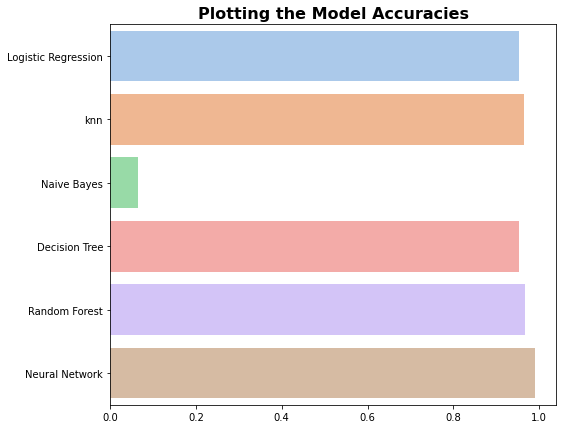

In [21]:
#comparing accuracies
plt.figure(figsize= (8,7))
ac = [lra,knna,nba,dta,rfa,nna]
name = ['Logistic Regression','knn','Naive Bayes','Decision Tree', 'Random Forest','Neural Network']
sns.barplot(x = ac,y = name,palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Plotting the Model Runtime')

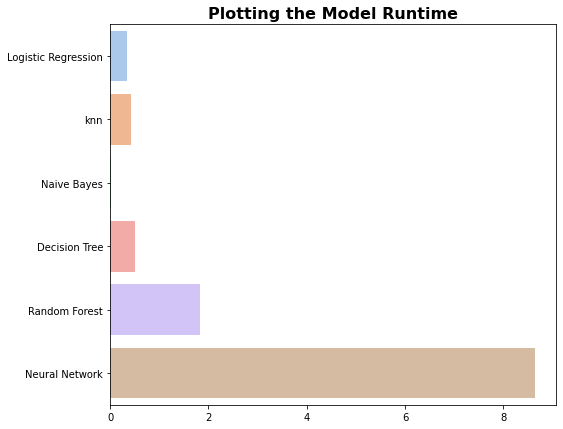

In [22]:
#comparing times
plt.figure(figsize= (8,7))
tc = [lrt,knnt,nbt,dtt,rft,nnt]
name = ['Logistic Regression','knn','Naive Bayes','Decision Tree', 'Random Forest','Neural Network']
sns.barplot(x = tc,y = name,palette='pastel')
plt.title("Plotting the Model Runtime", fontsize=16, fontweight="bold")

Bởi vì dữ liệu có tới 95 cột tương ứng với 95 biến điều này sẽ dẫn đến hiện tượng là Multicollinearity (có nghĩa là có mối tương quan chặt chẽ giữa các biến này với nhau). Trong trường hợp này, giải pháp được đề xuất là loại bỏ một trong các biến có liên quan đến nhau khỏi mô hình để không làm ảnh hưởng đến kết quả dự đoán. Multicollinearity được xác định bởi Variance Inflation Factor (VIF) tỷ lệ này xuất phát từ mối tương quan giữa các biến độc lập.

In [23]:
correlation_matrix = data.corr()
correlation_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


In [24]:
correlation_matrix = correlation_matrix.iloc[1:,1:]
correlation_matrix

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
ROA(C) before interest and depreciation before interest,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,0.066869,0.106461,0.323482,0.048882,0.250761,0.505580,0.505407,0.505281,0.775006,0.379839,-0.015932,0.687201,0.750564,0.000591,0.036511,0.115083,0.115040,0.025234,0.019635,-0.021930,0.079906,0.296158,0.013196,-0.026336,0.003988,-0.022208,-0.261427,0.261427,0.002967,-0.161671,-0.035729,0.685028,0.753339,-0.109888,0.210622,-0.033947,0.007019,-0.062660,-0.065919,0.022896,-0.014834,0.301996,-0.012543,0.259680,0.181993,0.098820,0.235314,-0.010530,-0.046009,-0.210256,0.388151,-0.004447,0.013330,0.052783,0.103819,-0.142734,0.021508,0.650217,0.023450,-0.296019,0.005716,-0.027280,0.001824,-0.029477,0.011759,-0.009192,0.052783,-0.142734,-0.086535,0.262454,0.159699,0.504311,0.129002,-0.160725,-0.109272,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,0.049909,0.075727,0.084334,0.288440,0.050362,0.225897,0.531799,0.531790,0.531821,0.764828,0.326239,-0.011829,0.654253,0.752578,0.003277,0.042208,0.125384,0.125872,0.024887,0.026977,-0.063970,0.081982,0.263615,0.014102,-0.018412,0.005440,-0.010323,-0.259972,0.259972,0.020707,-0.161868,-0.

In [25]:
drop_correlated_fea = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if(correlation_matrix.iloc[i,j] >= 0.894 or correlation_matrix.iloc[i,j] <= -0.894):
            if correlation_matrix.columns[j] not in drop_correlated_fea:
                drop_correlated_fea.append(correlation_matrix.columns[j])

In [26]:
len(drop_correlated_fea)

20

In [27]:
data2 = data.drop(drop_correlated_fea, axis = 1)

In [28]:
data2

,Bankrupt?,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (C),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Net worth/Assets,Long-term fund suitability ratio (A),Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.311664,0.017560,0.022102,0.848195,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.792424,0.005024,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.721275,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,4.580000e+08,0.671568,0.424206,0.676269,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.318137,0.021144,0.022080,0.848088,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.828824,0.005059,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.731975,2.394682e-02,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,2.490000e+09,0.671570,0.468828,0.308589,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.302035,0.780284,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.193713,0.307102,0.005944,0.022760,0.848094,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.792484,0.005100,0.006562,0.092318,0.148036,0.406580,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.013387,0.028997,0.381968,0.141016,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162,0.336731,0.277456,0.013879,0.742729,3.715116e-03,0.909903,0.002060,0.021387,1.791094e-03,1.022676e-03,7.610

Ngoài ra tập dữ liệu của chúng ta cũng không cân bằng bởi vì lượng dữ liệu với giá trị 'Bankrupt?' là 0 nhiều hơn rất nhiều so với 1. Do đó, các thuật toán thường dự đoán dữ liệu kém với các trường hợp giá trị 'Bankrupt?' là 1. Phương pháp lấy mẫu SMOTE là phương pháp dễ dàng và hữu ích nhất để áp dụng.
Kĩ thuật SMOTE bắt đầu từ các mẫu của lớp thiểu số và tạo ra các quan sát mới tổng hợp trong không gian đặc trưng một cách ngẫu nhiên bằng phương pháp nội suy. Do đó, nó cân bằng được dữ liệu. Tuy nhiên, nó không can thiệp vào mô hình ngoài việc tăng số lượng mẫu và không cung cấp thêm thông tin cho mô hình.

In [29]:
#defining dependent and independent variables
x = data2.drop(['Bankrupt?', ' Net Income Flag'], axis=1)
y = data2['Bankrupt?']

In [30]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [31]:
from imblearn.over_sampling import SMOTE 
def preprocess_inputs(df_):
    df_ = df_.copy()
    
    # Drop single-value column
    df_ = df_.drop(' Net Income Flag', axis=1)

    #We will remove the column Net Income Flag since it has only single value

    # Split df into X and y
    y_ = df_['Bankrupt?']
    X_ = df_.drop('Bankrupt?', axis=1)

    #Initializing SMOTE

    sm = SMOTE(random_state = 42)
    X_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

    # X_train_smote = pd.DataFrame(X_train_smote, columns=X_.columns)

    return X_train_smote, y_train_smote

In [32]:
x_train_smote, y_train_smote = preprocess_inputs(data2)

In [33]:
print('x_train_smote shape is ' , x_train_smote.shape) # Train data after SMOTE
print('y_train_smote shape is ' , y_train_smote.shape) # Train data after SMOTE
print('x_test shape is ' , x_test.shape) # Original test data
print('y_test shape is ' , y_test.shape) # Original test data

x_train_smote shape is  (10562, 74)
y_train_smote shape is  (10562,)
x_test shape is  (1364, 74)
y_test shape is  (1364,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


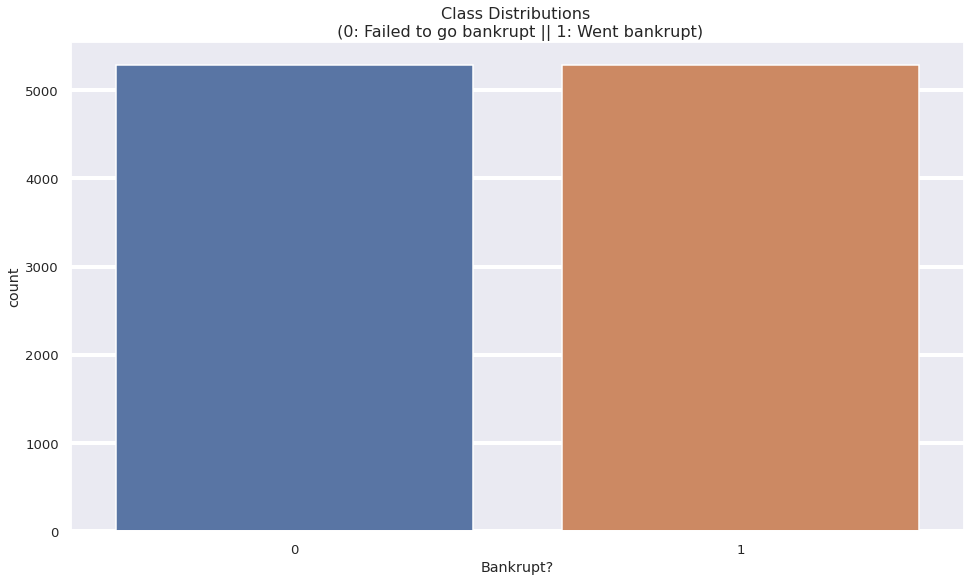

In [34]:
sns.set_theme(context = 'talk', style='darkgrid', palette='deep', font='sans-serif', font_scale = 0.8, rc={"grid.linewidth": 4})

plt.figure(figsize = (16,9))
sns.countplot(y_train_smote)
plt.title('Class Distributions \n (0: Failed to go bankrupt || 1: Went bankrupt)', fontsize=16)
plt.show()

In [35]:
# Logistic Regression
#training model
start = time.time()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train_smote,y_train_smote)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred)
end = time.time()
print('accuracy score = ',lra)
print("Classification Report",classification_report(y_test,y_pred))
lrt = end - start
print('run time: ', lrt)

confusion matrix:
 [[1042  276]
 [  35   11]]
accuracy score =  0.7719941348973607
Classification Report               precision    recall  f1-score   support

           0       0.97      0.79      0.87      1318
           1       0.04      0.24      0.07        46

    accuracy                           0.77      1364
   macro avg       0.50      0.51      0.47      1364
weighted avg       0.94      0.77      0.84      1364

run time:  0.5920202732086182


In [36]:
# KNeighbors Classifier
#training model
start = time.time()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
knn.fit(x_train_smote,y_train_smote)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
knna = accuracy_score(y_test,y_pred)
end = time.time()
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))
knnt = end - start
print('run time: ', knnt)

confusion matrix:
 [[1125  193]
 [  29   17]]
accuracy score =  0.8372434017595308
Classification Report               precision    recall  f1-score   support

           0       0.97      0.85      0.91      1318
           1       0.08      0.37      0.13        46

    accuracy                           0.84      1364
   macro avg       0.53      0.61      0.52      1364
weighted avg       0.94      0.84      0.88      1364

run time:  0.674067497253418


In [37]:
# Gaussian Naves Bayes
# training model
start = time.time()
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_smote,y_train_smote)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = nb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
nba = accuracy_score(y_test,y_pred)
end = time.time()
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))
nbt = end - start
print('run time: ', nbt)

confusion matrix:
 [[  56 1262]
 [   2   44]]
accuracy score =  0.07331378299120235
Classification Report               precision    recall  f1-score   support

           0       0.97      0.04      0.08      1318
           1       0.03      0.96      0.07        46

    accuracy                           0.07      1364
   macro avg       0.50      0.50      0.07      1364
weighted avg       0.93      0.07      0.08      1364

run time:  0.025447368621826172


In [38]:
# Decision Tree Classifier
#training model
start = time.time()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train_smote,y_train_smote)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
dta = accuracy_score(y_test,y_pred)
end = time.time()
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))
dtt = end - start
print('run time: ', dtt)

confusion matrix:
 [[1242   76]
 [  22   24]]
accuracy score =  0.9281524926686217
Classification Report               precision    recall  f1-score   support

           0       0.98      0.94      0.96      1318
           1       0.24      0.52      0.33        46

    accuracy                           0.93      1364
   macro avg       0.61      0.73      0.65      1364
weighted avg       0.96      0.93      0.94      1364

run time:  1.3009228706359863


In [39]:
# Random Forest
#training model
start = time.time()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 60, criterion = 'entropy',random_state = 0)
rf.fit(x_train_smote,y_train_smote)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
rfa = accuracy_score(y_test,y_pred)
end = time.time()
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))
rft = end - start
print('run time: ', rft)

confusion matrix:
 [[1279   39]
 [  23   23]]
accuracy score =  0.9545454545454546
Classification Report               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1318
           1       0.37      0.50      0.43        46

    accuracy                           0.95      1364
   macro avg       0.68      0.74      0.70      1364
weighted avg       0.96      0.95      0.96      1364

run time:  5.52187180519104


In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import Dense, Activation
import sys

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        sys.stdout.write(str(logs.get('loss'))+str(', '))
        sys.stdout.flush()
        self.losses.append(logs.get('loss'))
        
lr = LossHistory()

In [41]:
number_of_neurons_layer1 = 74
number_of_neurons_layer2 = 50
number_of_neurons_layer3 = 20
number_of_neurons_layer4 = 2
number_of_epochs = 50

dim =  74
samples = 10562

# design network
# from keras import optimizers
import tensorflow as tf
start = time.time()
sgd = tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.)

model = Sequential()
model.add(Dense(number_of_neurons_layer1,input_shape=(dim, ), activation='relu'))
model.add(Dense(number_of_neurons_layer2, activation='relu'))
model.add(Dense(number_of_neurons_layer3, activation='relu'))
model.add(Dense(number_of_neurons_layer4, activation='relu'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd)

model.fit(x_train_smote, y_train_smote, epochs=number_of_epochs, batch_size=256, validation_data=(x_test, y_test), verbose=0, shuffle=True,callbacks=[lr])

# #checking accuracy
nna = (100-min(lr.losses))/100
end = time.time()
print('/n accuracy score = ',nna)

nnt = end - start
print('run time: ', nnt)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


5.445104598999023, 4.777190685272217, 4.890151500701904, 4.909059524536133, 4.926546096801758, 4.861484050750732, 4.97841739654541, 5.096823215484619, 5.119046688079834, 5.150770664215088, 5.140711784362793, 5.187121868133545, 5.188488483428955, 5.190376281738281, 5.162088871002197, 5.169670104980469, 5.13948917388916, 5.150693416595459, 5.151615142822266, 5.128079891204834, 5.124897003173828, 5.084306716918945, 5.094518661499023, 5.0996479988098145, 5.09616231918335, 5.069977760314941, 5.0914692878723145, 5.100279331207275, 5.121507167816162, 5.132384300231934, 5.142827033996582, 5.11591100692749, 5.129024982452393, 5.135334491729736, 5.1287689208984375, 5.136107921600342, 5.132236480712891, 5.137298583984375, 5.163365840911865, 5.174657821655273, 5.165022373199463, 5.166172027587891, 4.34970760345459, 4.624910354614258, 4.678280830383301, 4.641833305358887, 4.695166110992432, 4.887629985809326, 4.926551818847656, 4.887988567352295, 4.903326988220215, 4.955540657043457, 4.928345203399

Text(0.5, 1.0, 'Plotting the Model Accuracies')

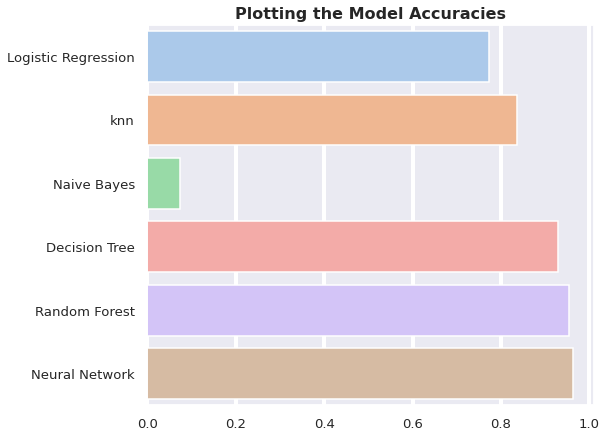

In [42]:
#comparing accuracies
plt.figure(figsize= (8,7))
ac = [lra,knna,nba,dta,rfa,nna]
name = ['Logistic Regression','knn','Naive Bayes','Decision Tree', 'Random Forest','Neural Network']
sns.barplot(x = ac,y = name,palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Plotting the Model Runtime')

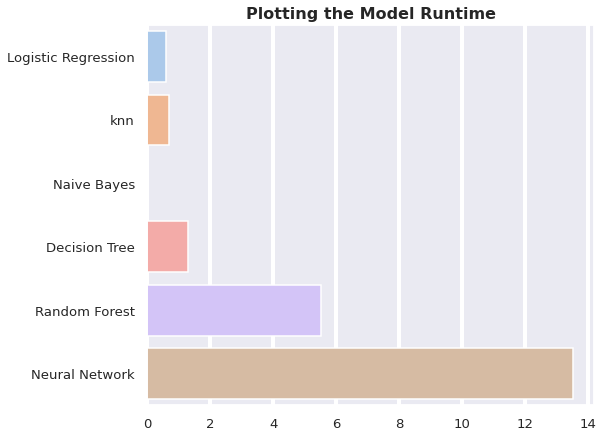

In [43]:
#comparing times
plt.figure(figsize= (8,7))
tc = [lrt,knnt,nbt,dtt,rft,nnt]
name = ['Logistic Regression','knn','Naive Bayes','Decision Tree', 'Random Forest','Neural Network']
sns.barplot(x = tc,y = name,palette='pastel')
plt.title("Plotting the Model Runtime", fontsize=16, fontweight="bold")

Ta có thể dùng cách khác để giảm số chiều dữ liệu bằng PCA. Với PCA ta sẽ có thể giảm số chiều dữ liệu mà vẫn không ảnh hưởng nhiều đến quá trình dự đoán vì PCA được đào tạo để trích xuất những đặc trưng của vector sao cho không mất đi dữ liệu quá nhiều

In [44]:
x = x.to_numpy()
x

array([[3.02646434e-01, 7.80984850e-01, 1.25696869e-04, ...,
        2.66006308e-02, 5.64050112e-01, 1.64687409e-02],
       [3.03556430e-01, 7.81505974e-01, 2.89785054e-04, ...,
        2.64576820e-01, 5.70174946e-01, 2.07943063e-02],
       [3.02035177e-01, 7.80283936e-01, 2.36129721e-04, ...,
        2.65547199e-02, 5.63706076e-01, 1.64741143e-02],
       ...,
       [3.03512199e-01, 7.81546395e-01, 2.50931192e-04, ...,
        2.67911567e-02, 5.65158396e-01, 9.76487375e-02],
       [3.03498181e-01, 7.81663308e-01, 1.23615412e-04, ...,
        2.68220477e-02, 5.65301507e-01, 4.40094472e-02],
       [3.13415329e-01, 7.86079039e-01, 1.43169543e-03, ...,
        2.67929526e-02, 5.65166944e-01, 2.33902238e-01]])

In [45]:
x.shape

(6819, 74)

In [46]:
y = y.to_numpy()
y

array([1, 1, 1, ..., 0, 0, 0])

In [47]:
from sklearn.decomposition import PCA

pca_breast = PCA(n_components=25)
data_PCA = pca_breast.fit_transform(x)

In [48]:
data_PCA.shape

(6819, 25)

In [49]:
data3 = pd.DataFrame(data = data_PCA, columns = [str(i) for i in range(25)])
data3['25'] = [i for i in y]
data3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,2.165330e+09,-3.814949e+07,-3.237615e+09,-2.063212e+09,-1.969494e+09,-1.410239e+09,-8.723455e+08,-3.342048e+09,-6.724872e+07,-6.176979e+07,-1.008738e+08,-4.089025e+07,-3.052468e+07,-1.450157e+07,-1.261796e+07,-1.608745e+07,-1.082433e+07,-9.594431e+06,-3.684855e+06,-3.477068e+06,-1.427628e+07,-7.717010e+05,-1.784430e+06,-863266.256808,0.459234,1
1,4.902366e+08,8.463795e+09,8.746100e+08,-3.292132e+09,-1.383796e+09,-1.194097e+09,-2.313543e+08,-2.330575e+09,3.305436e+07,-7.742768e+07,-6.047728e+07,-3.839345e+07,-9.459092e+06,2.809247e+06,-1.610367e+07,-1.966260e+06,-4.013065e+06,3.392343e+05,-3.207236e+06,-1.615297e+06,-1.379980e+07,7.903678e+05,-8.018587e+03,117114.426014,0.550716,1
2,-2.620138e+09,-2.169966e+09,-1.239416e+09,8.771527e+08,-2.812465e+09,-1.582306e+09,1.654892e+09,-4.584627e+08,-2.737372e+08,-8.123744e+07,5.236231e+09,-2.755552e+07,-2.891193e+07,-1.479720e+08,-1.282115e+08,-4.957818e+08,-4.983363e+06,-7.351532e+06,2.688157e+06,-2.636936e+06,-8.994466e+05,-5.664120e+07,5.083825e+06,-900147.997862,0.059048,1
3,3.249284e+09,5.987899e+09,-2.180465e+09,-4.385660e+09,-2.566962e+09,1.061380e+09,7.876119e+09,4.758288e+09,-5.484820e+07,2.406780e+07,-5.570970e+07,-1.881365e+07,-2.743767e+06,4.146900e+06,-2.497417e+07,1.379922e+07,1.078678e+06,-8.624433e+06,1.927873e+06,-1.874867e+07,-1.234257e+06,3.214677e+06,1.744171e+06,541452.036057,-0.089148,1
4,7.604602e+09,-2.951427e+09,2.267775e+09,-2.370486e+09,-1.647314e+09,-3.956955e+08,-4.681061e+08,2.215795e+09,-7.627852e+07,-4.244472e+07,-8.451889e+07,-6.779376e+06,-1.795122e+07,4.451653e+06,-1.761454e+07,-7.522076e+06,-2.229420e+06,-7.863227e+05,5.570674e+05,-2.746428e+06,-1.548594e+07,8.544160e+05,-6.655064e+05,-282772.691969,0.119958,1


In [50]:
x_train, x_test, y_train, y_test = train_test_split(data_PCA, y, test_size = 0.2, random_state = 0)

In [51]:
from imblearn.over_sampling import SMOTE 
def preprocess_inputs2(df_):
    df_ = df_.copy()

    # Split df into X and y
    y_ = df_['25']
    X_ = df_.drop('25', axis=1)

    #Initializing SMOTE

    sm = SMOTE(random_state = 42)
    X_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

    # sm = SMOTE(random_state = 42)
    # X_test_oversampled, y_test_oversampled = sm.fit_resample(X_train_smote, y_train_smote)
    # X_train_smote = pd.DataFrame(X_test_oversampled, columns=X_.columns)

    return X_train_smote, y_train_smote

In [52]:
x_train_smote, y_train_smote = preprocess_inputs2(data3)

In [53]:
print('x_train_smote shape is ' , x_train_smote.shape) # Train data after SMOTE
print('y_train_smote shape is ' , y_train_smote.shape) # Train data after SMOTE
print('x_test shape is ' , x_test.shape) # Original test data
print('y_test shape is ' , y_test.shape) # Original test data

x_train_smote shape is  (10562, 25)
y_train_smote shape is  (10562,)
x_test shape is  (1364, 25)
y_test shape is  (1364,)


In [54]:
# Logistic Regression
#training model
start = time.time()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train_smote,y_train_smote)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred)
end = time.time()
print('accuracy score = ',lra)
print("Classification Report",classification_report(y_test,y_pred))
lrt = end - start
print('run time: ', lrt)

confusion matrix:
 [[864 454]
 [ 23  23]]
accuracy score =  0.6502932551319648
Classification Report               precision    recall  f1-score   support

           0       0.97      0.66      0.78      1318
           1       0.05      0.50      0.09        46

    accuracy                           0.65      1364
   macro avg       0.51      0.58      0.44      1364
weighted avg       0.94      0.65      0.76      1364

run time:  0.6795270442962646


In [55]:
# KNeighbors Classifier
#training model
start = time.time()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
knn.fit(x_train_smote,y_train_smote)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
knna = accuracy_score(y_test,y_pred)
end = time.time()
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))
knnt = end - start
print('run time: ', knnt)

confusion matrix:
 [[1125  193]
 [  29   17]]
accuracy score =  0.8372434017595308
Classification Report               precision    recall  f1-score   support

           0       0.97      0.85      0.91      1318
           1       0.08      0.37      0.13        46

    accuracy                           0.84      1364
   macro avg       0.53      0.61      0.52      1364
weighted avg       0.94      0.84      0.88      1364

run time:  0.37674880027770996


In [56]:
# Gaussian Naves Bayes
# training model
start = time.time()
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_smote,y_train_smote)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = nb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
nba = accuracy_score(y_test,y_pred)
end = time.time()
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))
nbt = end - start
print('run time: ', nbt)

confusion matrix:
 [[  80 1238]
 [   4   42]]
accuracy score =  0.08944281524926687
Classification Report               precision    recall  f1-score   support

           0       0.95      0.06      0.11      1318
           1       0.03      0.91      0.06        46

    accuracy                           0.09      1364
   macro avg       0.49      0.49      0.09      1364
weighted avg       0.92      0.09      0.11      1364

run time:  0.011235237121582031


In [57]:
# Decision Tree Classifier
#training model
start = time.time()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train_smote,y_train_smote)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
dta = accuracy_score(y_test,y_pred)
end = time.time()
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))
dtt = end - start
print('run time: ', dtt)

confusion matrix:
 [[1184  134]
 [  36   10]]
accuracy score =  0.875366568914956
Classification Report               precision    recall  f1-score   support

           0       0.97      0.90      0.93      1318
           1       0.07      0.22      0.11        46

    accuracy                           0.88      1364
   macro avg       0.52      0.56      0.52      1364
weighted avg       0.94      0.88      0.91      1364

run time:  0.8583729267120361


In [58]:
# Random Forest
#training model
start = time.time()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 60, criterion = 'entropy',random_state = 0)
rf.fit(x_train_smote,y_train_smote)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
rfa = accuracy_score(y_test,y_pred)
end = time.time()
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))
rft = end - start
print('run time: ', rft)

confusion matrix:
 [[1256   62]
 [  37    9]]
accuracy score =  0.9274193548387096
Classification Report               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1318
           1       0.13      0.20      0.15        46

    accuracy                           0.93      1364
   macro avg       0.55      0.57      0.56      1364
weighted avg       0.94      0.93      0.93      1364

run time:  6.217079162597656


In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import Dense, Activation
import sys

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        sys.stdout.write(str(logs.get('loss'))+str(', '))
        sys.stdout.flush()
        self.losses.append(logs.get('loss'))
        
lr = LossHistory()

In [60]:
number_of_neurons_layer1 = 25
number_of_neurons_layer2 = 10
number_of_neurons_layer3 = 2

number_of_epochs = 50

dim =  25
samples = 10562

# design network
# from keras import optimizers
import tensorflow as tf
start = time.time()
sgd = tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.)

model = Sequential()
model.add(Dense(number_of_neurons_layer1,input_shape=(dim, ), activation='relu'))
model.add(Dense(number_of_neurons_layer2, activation='relu'))
model.add(Dense(number_of_neurons_layer3, activation='relu'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd)

model.fit(x_train_smote, y_train_smote, epochs=number_of_epochs, batch_size=256, validation_data=(x_test, y_test), verbose=0, shuffle=True,callbacks=[lr])

# #checking accuracy
nna = (100-min(lr.losses))/100
end = time.time()
print('/n accuracy score = ',nna)

nnt = end - start
print('run time: ', nnt)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


5.780885696411133, 5.270082950592041, 5.296148300170898, 5.159223556518555, 5.020742893218994, 5.072173595428467, 5.163650035858154, 5.120721340179443, 5.054460048675537, 5.082488059997559, 4.987436294555664, 5.018183708190918, 5.082529544830322, 5.057506084442139, 5.049314022064209, 5.040961265563965, 5.036976337432861, 5.0160956382751465, 5.023067474365234, 5.008930683135986, 4.9800848960876465, 4.990358829498291, 5.00044584274292, 5.009917736053467, 5.001002311706543, 4.984440803527832, 4.987987041473389, 5.029627799987793, 5.025698661804199, 5.070775508880615, 5.065859317779541, 5.078619956970215, 5.094587326049805, 5.110113143920898, 5.099083423614502, 5.1104254722595215, 5.099013805389404, 5.118614673614502, 5.1271071434021, 5.122989177703857, 5.133900165557861, 5.13583517074585, 5.370626449584961, 5.47725248336792, 5.414176940917969, 5.439508438110352, 5.247678279876709, 5.352118015289307, 5.200211048126221, 5.2505388259887695, 5.159772872924805, 5.227097034454346, 5.28691959381

Text(0.5, 1.0, 'Plotting the Model Accuracies')

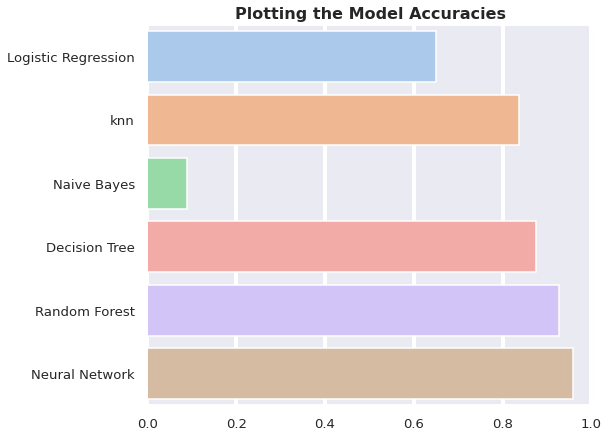

In [61]:
#comparing accuracies
plt.figure(figsize= (8,7))
ac = [lra,knna,nba,dta,rfa,nna]
name = ['Logistic Regression','knn','Naive Bayes','Decision Tree', 'Random Forest','Neural Network']
sns.barplot(x = ac,y = name,palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Plotting the Model Runtime')

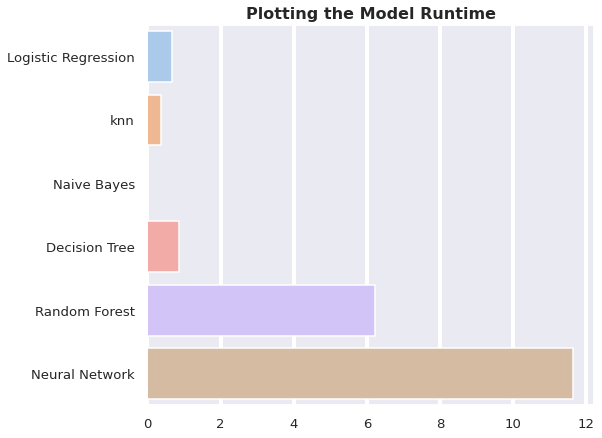

In [62]:
#comparing times
plt.figure(figsize= (8,7))
tc = [lrt,knnt,nbt,dtt,rft,nnt]
name = ['Logistic Regression','knn','Naive Bayes','Decision Tree', 'Random Forest','Neural Network']
sns.barplot(x = tc,y = name,palette='pastel')
plt.title("Plotting the Model Runtime", fontsize=16, fontweight="bold")